# 🍽️RESTURANT SALES DATA

## 📝 Introduction
This dataset contains detailed records of food orders made in a restaurant.
Each row represents a single customer order, including information about the ordered item, pricing, quantity, payment method, and date of purchase.

The dataset is ideal for analyzing restaurant performance, customer preferences, peak sales periods, revenue patterns, and item popularity. It can also be used for data cleaning practice, visualization, and building dashboards.

## 📌 Key Features of the Dataset
1.Order ID: Unique identifier for each order

2.Customer ID: Unique ID representing the customer

3.Category: Type of food item (e.g., Main Dishes, Beverages, Desserts, Sides)

4.Item: Specific food item ordered

5.Price: Price of the item

6.Quantity: Number of units ordered

7.Order Total: Final bill for that order (Price × Quantity)

8.Order Date: Date when the order was placed

9.Payment Method: Medium of payment (Cash, Card, Digital Wallet, etc.)

## 🎯 AIM 
 The aim of this project is to analyze restaurant sales data to gain insights into customer behavior, sales trends, and overall business performance. The project seeks to identify the key factors influencing sales, evaluate the performance of different menu items and time periods, and provide data-driven recommendations to improve revenue and operational efficiency.


## IMPORT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## DATA LOADING

In [ ]:
df = pd.read_csv(r"C:\Users\RASEENA\Downloads\restaurant_sales_data.csv")
df

## Number of rows & number of columns in the dataset

In [25]:
num_rows,num_columns = df.shape
print("Number of Rows :", num_rows )
print("Number of Columns :", num_columns )

Number of Rows : 17534
Number of Columns : 9


In [52]:
list(df.columns)
# ALL COLUM HEADINGS

['Order ID',
 'Customer ID',
 'Category',
 'Item',
 'Price',
 'Quantity',
 'Order Total',
 'Order Date',
 'Payment Method']

## summery of dataset

In [26]:
# get a concise summery of the dataset, including the data types and non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17534 entries, 0 to 17533
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        17534 non-null  object 
 1   Customer ID     17534 non-null  object 
 2   Category        17534 non-null  object 
 3   Item            15776 non-null  object 
 4   Price           16658 non-null  float64
 5   Quantity        17104 non-null  float64
 6   Order Total     17104 non-null  float64
 7   Order Date      17534 non-null  object 
 8   Payment Method  16452 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.2+ MB


In [27]:
# generate descriative statistics for numerical columns
df.describe()
#Numerical columns-inte summary statistics automatically generate 

,Price,Quantity,Order Total
count,16658.000000,17104.000000,17104.000000
mean,6.586325,3.014149,19.914494
std,4.834652,1.414598,18.732549
min,1.000000,1.000000,1.000000
25%,3.000000,2.000000,7.500000
50%,5.000000,3.000000,15.000000
75%,7.000000,4.000000,25.000000
max,20.000000,5.000000,100.000000


## Basic Data Quality Check

In [28]:
df = pd.read_csv("restaurant_sales_data.csv")
df.duplicated().sum()
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17534 entries, 0 to 17533
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        17534 non-null  object 
 1   Customer ID     17534 non-null  object 
 2   Category        17534 non-null  object 
 3   Item            15776 non-null  object 
 4   Price           16658 non-null  float64
 5   Quantity        17104 non-null  float64
 6   Order Total     17104 non-null  float64
 7   Order Date      17534 non-null  object 
 8   Payment Method  16452 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.2+ MB


## DATA CLEANING

### Data type

In [10]:
#All column data type 
df.dtypes

Order ID           object
Customer ID        object
Category           object
Item               object
Price             float64
Quantity          float64
Order Total       float64
Order Date         object
Payment Method     object
dtype: object

In [15]:
# change data type Order Date, because Order Date data type is not object
df['Order Date'] = pd.to_datetime(df['Order Date'])
# 'order Date' column  il ninn 'month ' ENNA NEW Co;umn undakkunnu,month wise analyse cheyyan vendid
df["Month"] = df["Order Date"].dt.month

In [12]:
df.dtypes

Order ID                  object
Customer ID               object
Category                  object
Item                      object
Price                    float64
Quantity                 float64
Order Total              float64
Order Date        datetime64[ns]
Payment Method            object
dtype: object

#### duplicate values 

In [13]:
# Checking duplicate values 
len(df) == len(df.drop_duplicates())



# ethil duplicate values illathath konadann true vannittullath
#len(df) == len(df.drop_duplicates())   ---> ethinte meaning data setil ulla rows
# um data seti le dublicate remove cheythitulla raw yum eqaual anno
# evide ann ath kondann true vannath


True

### MISSING VALUES

In [14]:
# Check missing values count in each column
print(" Missing values in each column:")
print(df.isnull().sum())

 Missing values in each column:
Order ID             0
Customer ID          0
Category             0
Item              1758
Price              876
Quantity           430
Order Total        430
Order Date           0
Payment Method    1082
dtype: int64


In [38]:
# Clean missing Item values 
df = df.dropna(subset=['Item'])
df

# missing aya items drop cheyth removeaki

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash
5,ORD_381680,CUST_031,Main Dishes,Salmon,18.0,5.0,90.0,2022-07-20,Digital Wallet
...,...,...,...,...,...,...,...,...,...
17527,ORD_223096,CUST_088,Side Dishes,Garlic Bread,4.0,3.0,12.0,2022-04-06,Credit Card
17528,ORD_721774,CUST_006,Side Dishes,Mashed Potatoes,4.0,5.0,20.0,2022-04-22,Digital Wallet
17530,ORD_974128,CUST_069,Desserts,Ice Cream,5.0,3.0,15.0,2023-12-18,Cash
17531,ORD_108324,CUST_050,Desserts,Ice Cream,5.0,4.0,20.0,2022-05-20,Digital Wallet


In [39]:
# Clean missing Price values 
df. dropna(subset= 'Price')

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash
5,ORD_381680,CUST_031,Main Dishes,Salmon,18.0,5.0,90.0,2022-07-20,Digital Wallet
...,...,...,...,...,...,...,...,...,...
17527,ORD_223096,CUST_088,Side Dishes,Garlic Bread,4.0,3.0,12.0,2022-04-06,Credit Card
17528,ORD_721774,CUST_006,Side Dishes,Mashed Potatoes,4.0,5.0,20.0,2022-04-22,Digital Wallet
17530,ORD_974128,CUST_069,Desserts,Ice Cream,5.0,3.0,15.0,2023-12-18,Cash
17531,ORD_108324,CUST_050,Desserts,Ice Cream,5.0,4.0,20.0,2022-05-20,Digital Wallet


In [40]:
# Clean missing Quantity values 
df. dropna(subset= 'Quantity')

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash
5,ORD_381680,CUST_031,Main Dishes,Salmon,18.0,5.0,90.0,2022-07-20,Digital Wallet
...,...,...,...,...,...,...,...,...,...
17527,ORD_223096,CUST_088,Side Dishes,Garlic Bread,4.0,3.0,12.0,2022-04-06,Credit Card
17528,ORD_721774,CUST_006,Side Dishes,Mashed Potatoes,4.0,5.0,20.0,2022-04-22,Digital Wallet
17530,ORD_974128,CUST_069,Desserts,Ice Cream,5.0,3.0,15.0,2023-12-18,Cash
17531,ORD_108324,CUST_050,Desserts,Ice Cream,5.0,4.0,20.0,2022-05-20,Digital Wallet


In [41]:
# Clean missing Order Total values 
df. dropna(subset= 'Order Total')

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash
5,ORD_381680,CUST_031,Main Dishes,Salmon,18.0,5.0,90.0,2022-07-20,Digital Wallet
...,...,...,...,...,...,...,...,...,...
17527,ORD_223096,CUST_088,Side Dishes,Garlic Bread,4.0,3.0,12.0,2022-04-06,Credit Card
17528,ORD_721774,CUST_006,Side Dishes,Mashed Potatoes,4.0,5.0,20.0,2022-04-22,Digital Wallet
17530,ORD_974128,CUST_069,Desserts,Ice Cream,5.0,3.0,15.0,2023-12-18,Cash
17531,ORD_108324,CUST_050,Desserts,Ice Cream,5.0,4.0,20.0,2022-05-20,Digital Wallet


In [19]:
pd.reset_option('display.max_rows',10)
pd.reset_option('display.max_colwidth',10)
#starting 10 raw and ending 10 raw display akan

In [42]:
# Clean missing  Order Date values 
df. dropna(subset= 'Order Date')

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash
5,ORD_381680,CUST_031,Main Dishes,Salmon,18.0,5.0,90.0,2022-07-20,Digital Wallet
...,...,...,...,...,...,...,...,...,...
17527,ORD_223096,CUST_088,Side Dishes,Garlic Bread,4.0,3.0,12.0,2022-04-06,Credit Card
17528,ORD_721774,CUST_006,Side Dishes,Mashed Potatoes,4.0,5.0,20.0,2022-04-22,Digital Wallet
17530,ORD_974128,CUST_069,Desserts,Ice Cream,5.0,3.0,15.0,2023-12-18,Cash
17531,ORD_108324,CUST_050,Desserts,Ice Cream,5.0,4.0,20.0,2022-05-20,Digital Wallet


In [43]:
# Clean missing Payment Method  values 
df['Payment Method'] = df['Payment Method'].fillna('Unknown')
df

C:\Users\RASEENA\AppData\Local\Temp\ipykernel_23100\2146532775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Payment Method'] = df['Payment Method'].fillna('Unknown')


,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash
5,ORD_381680,CUST_031,Main Dishes,Salmon,18.0,5.0,90.0,2022-07-20,Digital Wallet
...,...,...,...,...,...,...,...,...,...
17527,ORD_223096,CUST_088,Side Dishes,Garlic Bread,4.0,3.0,12.0,2022-04-06,Credit Card
17528,ORD_721774,CUST_006,Side Dishes,Mashed Potatoes,4.0,5.0,20.0,2022-04-22,Digital Wallet
17530,ORD_974128,CUST_069,Desserts,Ice Cream,5.0,3.0,15.0,2023-12-18,Cash
17531,ORD_108324,CUST_050,Desserts,Ice Cream,5.0,4.0,20.0,2022-05-20,Digital Wallet


In [22]:
print(" Missing values in each column:")
print(df.isnull().sum())
# missing values full remove

 Missing values in each column:
Order ID          0
Customer ID       0
Category          0
Item              0
Price             0
Quantity          0
Order Total       0
Order Date        0
Payment Method    0
dtype: int64


In [46]:
pd.set_option('display.max_rows',10)
pd.set_option('display.max_columns',10)
df
#starting 10 raw and end 10 raw display akan

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
3,ORD_630508,CUST_075,Drinks,NaN,NaN,2.0,5.0,2022-08-09,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash
...,...,...,...,...,...,...,...,...,...
17529,ORD_320102,CUST_021,Drinks,NaN,NaN,4.0,4.0,2023-12-23,Cash
17530,ORD_974128,CUST_069,Desserts,Ice Cream,5.0,3.0,15.0,2023-12-18,Cash
17531,ORD_108324,CUST_050,Desserts,Ice Cream,5.0,4.0,20.0,2022-05-20,Digital Wallet
17532,ORD_612647,CUST_073,Side Dishes,Mashed Potatoes,4.0,2.0,8.0,2022-01-27,Digital Wallet


## Order Total Calculation Consistency Check

In [46]:
# Recalculate Order Total (Price × Quantity)
df["Order Total"] = df["Price"] * df["Quantity"]
df.head(10)
# missing values remove cheyumbol order total colum thil mismatch varam athkondann eth cheyuunath

C:\Users\RASEENA\AppData\Local\Temp\ipykernel_23100\2024440784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Order Total"] = df["Price"] * df["Quantity"]


,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash
5,ORD_381680,CUST_031,Main Dishes,Salmon,18.0,5.0,90.0,2022-07-20,Digital Wallet
6,ORD_270994,CUST_071,Side Dishes,Garlic Bread,4.0,5.0,20.0,2022-08-19,Credit Card
9,ORD_743636,CUST_085,Main Dishes,Vegetarian Platter,14.0,5.0,70.0,2022-08-07,Unknown
10,ORD_117003,CUST_021,Desserts,Brownie,6.0,2.0,12.0,2023-12-09,Credit Card
11,ORD_726419,CUST_025,Main Dishes,Salmon,18.0,5.0,90.0,2023-10-30,Cash
12,ORD_754176,CUST_047,Main Dishes,Salmon,18.0,1.0,18.0,2023-04-11,Cash


In [47]:
#Remove extra spaces inside the text
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].str.replace(r'\s+', ' ', regex=True)
df

C:\Users\RASEENA\AppData\Local\Temp\ipykernel_23100\1780545546.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.replace(r'\s+', ' ', regex=True)


,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash
5,ORD_381680,CUST_031,Main Dishes,Salmon,18.0,5.0,90.0,2022-07-20,Digital Wallet
...,...,...,...,...,...,...,...,...,...
17527,ORD_223096,CUST_088,Side Dishes,Garlic Bread,4.0,3.0,12.0,2022-04-06,Credit Card
17528,ORD_721774,CUST_006,Side Dishes,Mashed Potatoes,4.0,5.0,20.0,2022-04-22,Digital Wallet
17530,ORD_974128,CUST_069,Desserts,Ice Cream,5.0,3.0,15.0,2023-12-18,Cash
17531,ORD_108324,CUST_050,Desserts,Ice Cream,5.0,4.0,20.0,2022-05-20,Digital Wallet


## Exploratory Data Analysis

###  Basic Exploratory Data Analysis¶

In [8]:
# Shape (rows & columns)
df.shape


(17534, 9)

In [19]:
# First 5 rows
df.head()


,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
3,ORD_630508,CUST_075,Drinks,NaN,NaN,2.0,5.0,2022-08-09,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash


In [20]:
# Summary of numeric data
df.describe()


,Price,Quantity,Order Total
count,16658.000000,17104.000000,17104.000000
mean,6.586325,3.014149,19.914494
std,4.834652,1.414598,18.732549
min,1.000000,1.000000,1.000000
25%,3.000000,2.000000,7.500000
50%,5.000000,3.000000,15.000000
75%,7.000000,4.000000,25.000000
max,20.000000,5.000000,100.000000


In [21]:
# Info about column types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17534 entries, 0 to 17533
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        17534 non-null  object 
 1   Customer ID     17534 non-null  object 
 2   Category        17534 non-null  object 
 3   Item            15776 non-null  object 
 4   Price           16658 non-null  float64
 5   Quantity        17104 non-null  float64
 6   Order Total     17104 non-null  float64
 7   Order Date      17534 non-null  object 
 8   Payment Method  16452 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.2+ MB


### Value Counts

In [23]:
# category-wise count
df["Category"].value_counts()


Category
Main Dishes    3551
Starters       3527
Desserts       3496
Drinks         3488
Side Dishes    3472
Name: count, dtype: int64

In [22]:
# Item-wise count
df["Item"].value_counts().head(10)


Item
Pasta Alfredo      998
Side Salad         978
Water              956
Ice Cream          936
French Fries       897
Grilled Chicken    822
Mashed Potatoes    799
Chocolate Cake     798
Coca Cola          756
Cheese Fries       686
Name: count, dtype: int64

In [24]:
# Payment method usage
df["Payment Method"].value_counts()


Payment Method
Credit Card       5504
Cash              5499
Digital Wallet    5449
Name: count, dtype: int64

### Sales Insights

##### Total Revenue

In [15]:
df["Order Total"].sum()
# order nte total cheyumbo total revenue kittum

np.float64(340617.5)

##### Average order value

In [16]:
df["Order Total"].mean()
# order total nte average 

np.float64(19.914493685687557)

##### Highest priced item

In [17]:
df[["Item", "Price"]].sort_values(by="Price", ascending=False).head(5)

# ettavum vila kudiya 5 item kannikkukka
# df[["Item", "Price"] = data setil ninn item column price mathram select cheyyuka,
# . .sort_values(by="Price",= price n anusarich sort cheyyukka
#  ascending=False = highest price first

,Item,Price
17495,Steak,20.0
6771,Steak,20.0
3558,Steak,20.0
3586,Steak,20.0
11747,Steak,20.0


## VISUALIZATION

#### Top 10 Items Ordered (Bar Chart)

* Goal : The goal is to find out which category is ordered the most and the least.

* Chart: Bar Chart

* EDA Type: Univariate EDA (Because only one column -> Category)

* Structure: This structure helps in easily comparing categories.

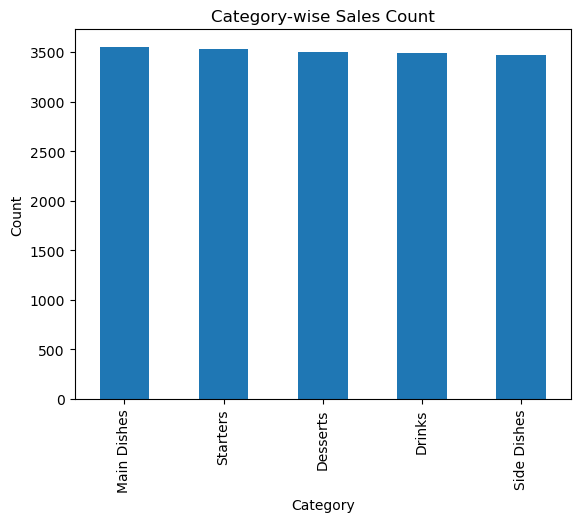

In [20]:
df["Category"].value_counts().plot(kind="bar")
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Category-wise Sales Count")
plt.show()


#### 📌 Insights:
* The bar chart shows which categories are ordered the most by customers.

* The category with the highest bar is the most popular and contributes the most to orders.

* Categories with shorter bars are less preferred and may need improvement, promotions, or redesign.

* The distribution reveals customer preferences and helps in menu planning and inventory decisio

#### Payment Method Usage (Pie Chart)

* Goal : The goal of this visualization is to understand how customers prefer to pay.
It shows which payment method is used the most and which one is used the least.

* Chart : Pie Chart

* EDA Type : Univariate EDA (Because only one column -> Payment Method )

* Structure : Counts how many times each payment method appears,Plots the count values as a pie chart, shows the percentage on each slice., 

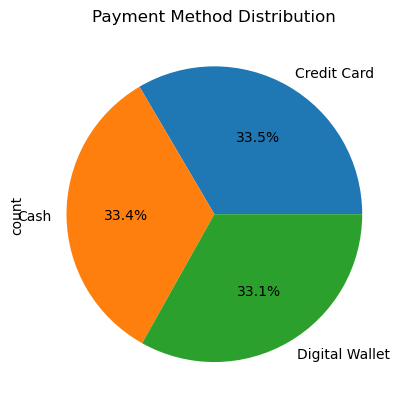

In [29]:
# Payment Method Usage (Pie Chart)
df["Payment Method"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Payment Method Distribution")
plt.show()
# Purpose → dataset-il ethra order eth payment method ubayogich cheyyunnuvenn  pie chart kannikkukka
#.value_counts()  --->Column-ile unique values count cheyunnu.




#### 📌 Insights:

* The bar chart shows which categories are ordered the most by customers.

* The category with the highest bar is the most popular and contributes the most to orders.

* Categories with shorter bars are less preferred and may need improvement, promotions, or redesign.

#### Monthly Sales Trend (Line Chart)

* Goal : To visualize how total sales change month by month, showing trends and seasonality.

* Chart : Line Chart

* EDA Type : Time Series (a Analysis a type of univariate/multivariate analysis depending on what you compare)

* Structure : Extract month → group by month and sum total sales → plot line chart → label axes and title → display chart. 

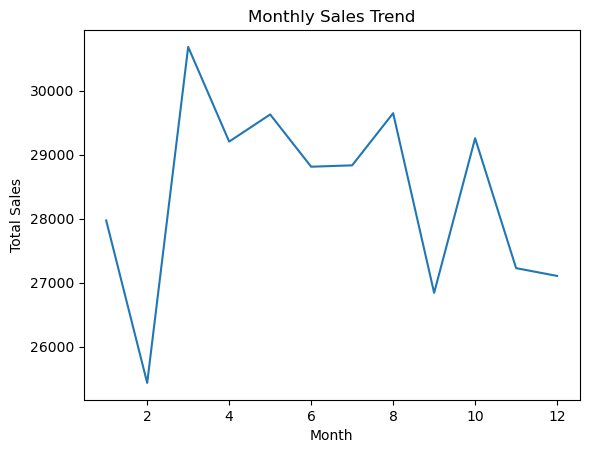

In [21]:

df["Month"] = df["Order Date"].dt.month

df.groupby("Month")["Order Total"].sum().plot(kind="line")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

#### 📌 Insights: 

* Identify high and low sales months.

* Detect seasonal patterns or trends.

* Helps in sales planning and forecasting.

#### Total Sales per Month

* Goal : To visualize total sales per month clearly, showing trends over time with markers for each month.

* Chart : Line Chart (Seaborn)

* EDA Type : Time Series Analysis (univariate trend of sales over months).

* Structure :  Aggregate total sales by month → reset index → plot line chart with markers using Seaborn → display chart.

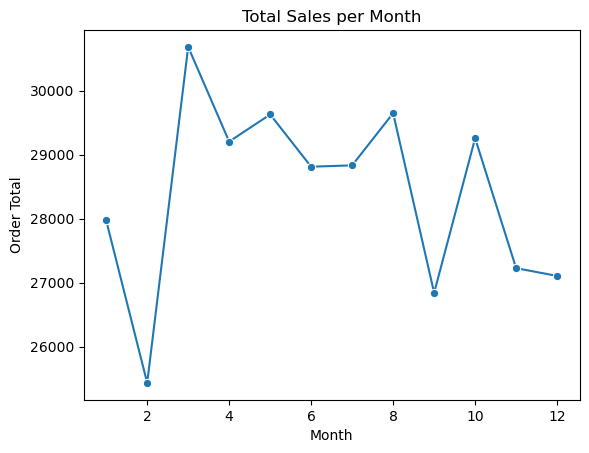

In [29]:
monthly_sales = df.groupby("Month")["Order Total"].sum().reset_index()

sns.lineplot(data=monthly_sales, x="Month", y="Order Total", marker='o')
plt.title("Total Sales per Month")
plt.show()


#### 📌Insights

* Easily spot peaks and dips in monthly sales.

* Markers make it simpler to see exact values for each month.

* Can help in trend analysis and forecasting.

#### Category-wise Sales Bar Chart

* Goal : To visualize total sales per product category, helping identify which categories generate the most revenue.

* Chart : Bar Chart (Seaborn)

* EDA Type : Categorical Analysis (Univariate / Aggregated Analysis) – examining sales across a single categorical variable.

* Structure : Aggregate total sales by category → reset index → plot bar chart using Seaborn → add title → display chart.

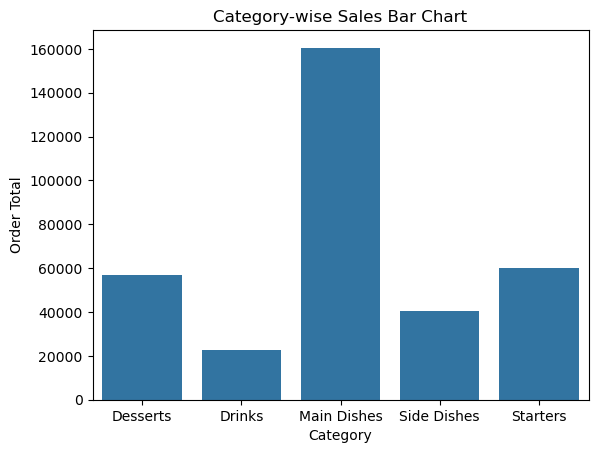

In [30]:
category_sales = df.groupby("Category")["Order Total"].sum().reset_index()
sns.barplot(data=category_sales, x="Category", y="Order Total")
plt.title("Category-wise Sales Bar Chart")
plt.show()


#### 📌 Insights

* Quickly see highest and lowest revenue-generating categories.

* Helps in inventory, marketing, and business decisions.

 * For example, if Electronics is highest → focus promotions or stock accordingly.

#### Payment Method Count Plot

* Goal : To visualize the number of orders for each payment method, showing which methods are most or least popular.

* Chart : Bar Chart (Seaborn)

* EDA Type : Univariate Analysis (analyzing one categorical variable).

* Structure : Select the column → plot count of each category using Seaborn → add title → display the chart.

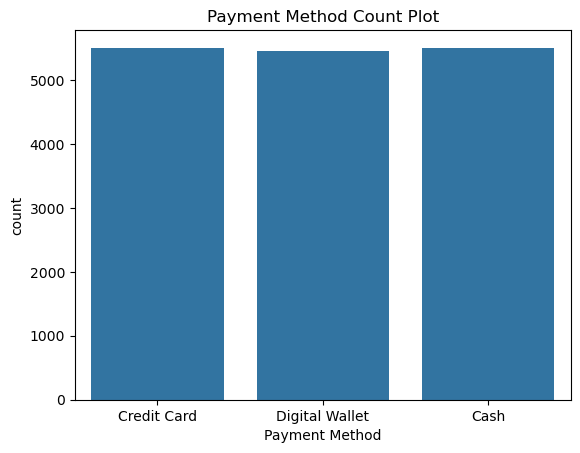

In [31]:
sns.countplot(data=df, x="Payment Method")
plt.title("Payment Method Count Plot")
plt.show()
# eth payment method il order kudum enn kannikkan

#### 📌Insights

* Quickly see the most preferred payment method.

* Helps in business decisions, like which payment options to promote or optimize.

#### Quantity vs Price Scatter Plot

* Goal : To visualize the relationship between Quantity and Price for orders, while also showing how different categories are distributed.

* Chart : Scatter Plot (Seaborn) 

* EDA Type : Bivariate / Multivariate Analysis – analyzing the relationship between two numerical variables and one categorical variable.

* Structure : Select two numerical columns → plot a scatter plot using Seaborn → use hue for category differentiation  → add title → display the chart.

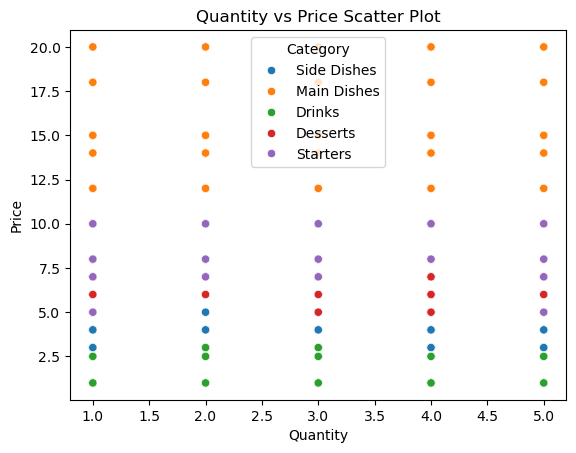

In [32]:
sns.scatterplot(data=df, x="Quantity", y="Price", hue="Category")
plt.title("Quantity vs Price Scatter Plot")
plt.show()
# price vs quantity nte relation kannikkunuu
# hue="Category" → color different categories-nayit display cheyyum

#### 📌Insights

* Identify correlation between Quantity and Price (e.g., higher-priced items might have lower quantities).

* Detect outliers or unusual patterns (e.g., very high quantity at very low price).

* See category-wise clustering of data points, helping in product analysis.

#### Category-wise Sales

* Goal :To visualize total sales per category to identify the highest and lowest revenue-generating categories.

* Chart : bar chart (Seaborn) 

* EDA Type : Univariate (analyzing one categorical variable (Category) and its total sales)

* Structure : Group data by category and sum sales → define colors → plot bar chart → add title and axis labels → display chart.

C:\Users\RASEENA\AppData\Local\Temp\ipykernel_6324\3800456171.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x="Category", y="Order Total", palette=colors) # data=category_sales → chart ee dataframe use cheyyum.


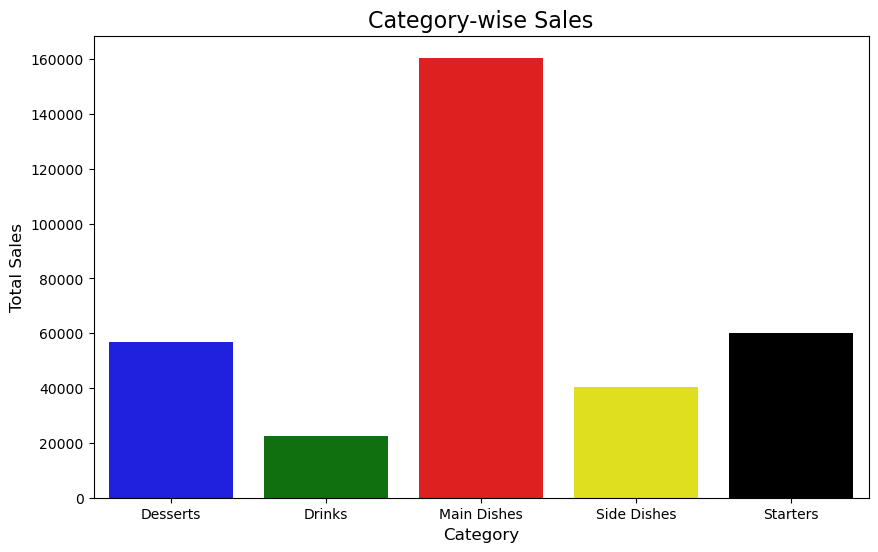

In [39]:

# Groupby data
category_sales = df.groupby("Category")["Order Total"].sum().reset_index()
# df.groupby("Category")["Order Total"].sum() → oro category-leyum total sales calculate cheyyunnu.
# .reset_index() → groupby result dataframe ayi convert cheyunnu


# Custom colors for bars
colors = ["Blue", "Green", "Red", "Yellow", "Black"]  

plt.figure(figsize=(10,6))  #Plot-nte width=10, height=6 inches.figure → better visibility.
sns.barplot(data=category_sales, x="Category", y="Order Total", palette=colors) # data=category_sales → chart ee dataframe use cheyyum.
# x="Category" → x-axis-il Category names. # y="Order Total" → y-axis-il total sales.
# palette=colors → bar colors customize cheyyunnu

plt.title("Category-wise Sales", fontsize=16) # #plt.title() → chart-ന് title.
plt.xlabel("Category", fontsize=12) # #plt.xlabel() → x-axis name.
plt.ylabel("Total Sales", fontsize=12) # # p)lt.ylabel() → y-axis name.
plt.show()

#### 📌 Insights

* Easily spot top-selling categories.

* Helps in inventory, marketing, and sales strategy decisions.

* Example: if Electronics has the tallest bar → it generates the most revenue; if Stationery is lowest → less focus may be needed there.

## UNIVARIATE ANALYSIS

#### Numerical Columns (Price, Quantity, Order Total)


#### Order Total Histogram with KDE

* Goal : To visualize the distribution of total order values, showing how frequently different order totals occur and the overall shape of the data.

* Chart : Histogram with KDE (Seaborn)

* EDA Type : Univariate Analysis (Numerical) – analyzing the distribution of a single numerical variable.

* Structure : Select the numerical column → plot histogram with KDE using Seaborn → set figure size and title → display chart.

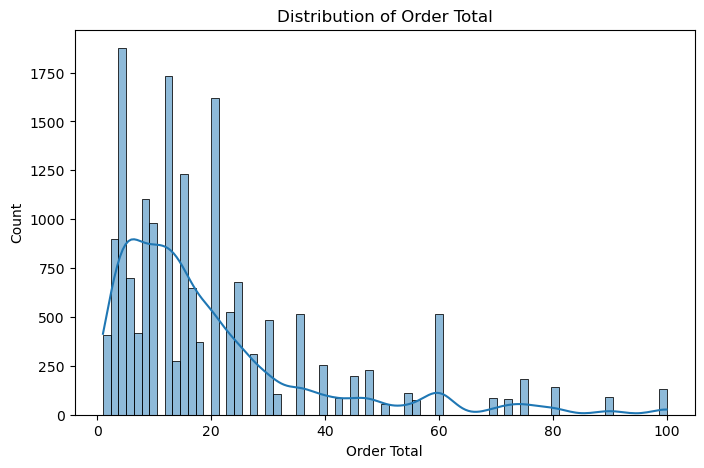

In [6]:
# Histogram + KDE
plt.figure(figsize=(8,5))
sns.histplot(df["Order Total"], kde=True)
plt.title("Distribution of Order Total")
plt.show()



#### 📌 Insights

Identify most common order totals (mode of distribution).

Check skewness:

Right-skew → many small orders, few very large ones.

Left-skew → many large orders, few small ones.

Detect outliers or unusual high/low orders.

Understand overall revenue distribution, which helps in pricing or marketing strategies.

#### Order Total Boxplot

* Goal : To visualize the spread, central tendency, and outliers of order totals in your dataset.

* Chart : Boxplot (Seaborn)

* EDA Type : Univariate Analysis (Numerical) – examining a single numerical variable for spread and outliers.

* Structure : Select numerical column → plot boxplot using Seaborn → set figure size and title → display chart.


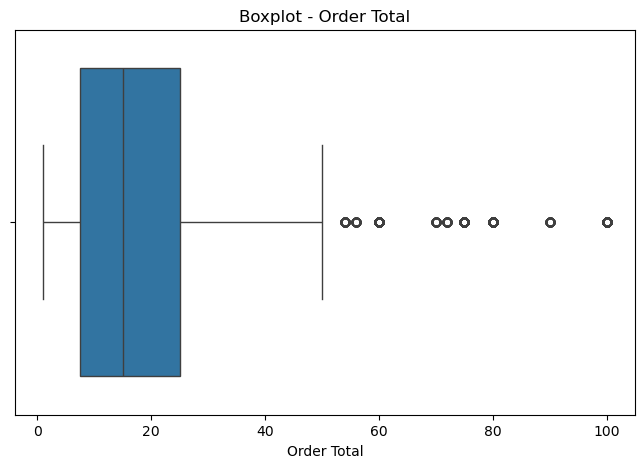

In [41]:
# BOXPLOT 
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Order Total"])
plt.title("Boxplot - Order Total")
plt.show()



#### 📌 Insights

* Shows median and quartiles of Order Total.

* Detects outliers (very high or very low order totals).

* Helps understand data distribution (skewness, spread).

* Useful for pricing strategy, anomaly detection, or revenue analysis.

#### Categorical Column (Category, Payment Method)

#### Category Count Plot:

* Goal : To visualize how many orders belong to each product category, showing the frequency of each category.

* Chart : Bar Chart (Seaborn) 

* EDA Type : Univariate Analysis – analyzing frequency of a single categorical variable.

* Structure : Select categorical column → plot count of each category using Seaborn → set figure size and title → display chart.

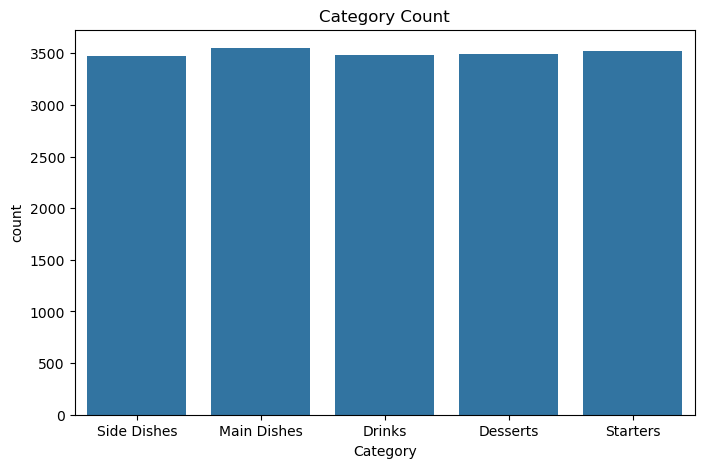

In [43]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Category")
plt.title("Category Count")
plt.show()


#### 📌 Insights
* dentify most and least frequent categories.

* Helps understand customer preferences.

* Useful for inventory planning, marketing, and sales strategy.

#### Payment Method Count Plot:

* Goal :To visualize the number of orders made with each payment method, showing which methods are most or least popular.

* Chart : Bar Chart (Seaborn) 

* EDA Type : Univariate Analysis – analyzing frequency of a single categorical variable.

* Structure : Select categorical column → plot count of each category using Seaborn → set figure size and title → display chart.

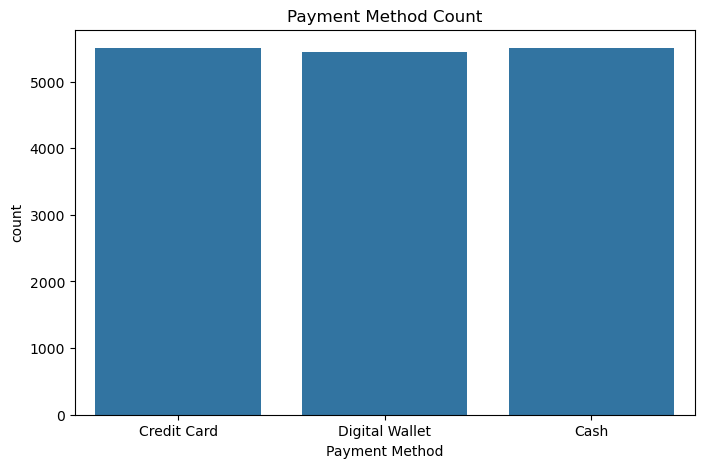

In [44]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Payment Method")
plt.title("Payment Method Count")
plt.show()


#### 📌 Insights
* Identify most and least used payment methods.

* Helps in understanding customer payment preferences.

* Useful for optimizing payment options or promotions.

## BIVARIATE ANALYSIS

### Numerical vs Numerical (Quantity vs Price)

#### Quantity vs Price Scatter Plot
* Goal : To visualize the relationship between Quantity and Price for orders and check for patterns or trends.

* Chart : Scatter Plot (Seaborn)

* EDA Type :  Bivariate Analysis (Numerical) – analyzing the relationship between two numerical variables.

* Structure : Select two numerical columns → plot scatter plot using Seaborn → set figure size and title → display chart.

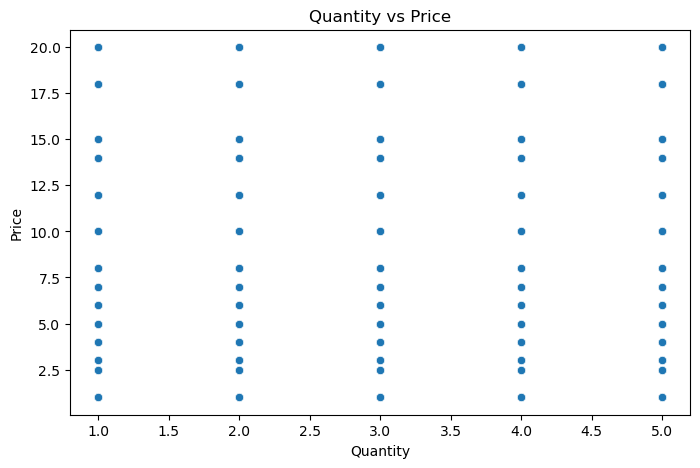

In [45]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Quantity", y="Price")
plt.title("Quantity vs Price")
plt.show()


#### 📌 Insights
* Identify correlation patterns: e.g., do higher-priced items tend to be ordered in smaller quantities?

* Detect outliers, like very high quantity with low price.

* Useful for pricing strategy and inventory analysis.

### Categorical vs Numerical (Category vs Order Total)

#### Category vs Total Sales Bar Chart

* Goal : To visualize total sales for each product category, helping identify which categories contribute most to revenue

* Chart : Bar Chart (Seaborn)

* EDA Type :  Bivariate Analysis 

* Structure :  Select categorical and numerical columns → plot bar chart using Seaborn → set figure size and title → display chart.

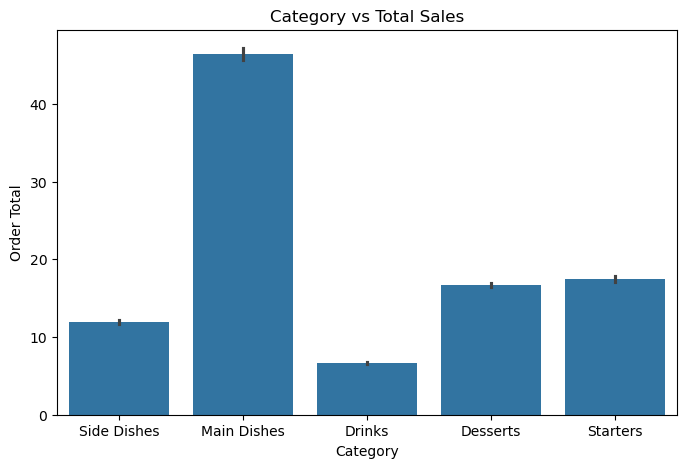

In [46]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Category", y="Order Total")
plt.title("Category vs Total Sales")
plt.show()


#### 📌 Insights
* Identify highest and lowest revenue-generating categories.

* Helps in business decisions, inventory management, and marketing strategies.

* Example: if Electronics has the tallest bar → it generates the most revenue; if Stationery is lowest → less revenue from that category.

### Month vs Total Sales

#### Monthly Sales Trend Line Chart
* Goal : To visualize how total sales change month by month, showing trends and seasonality in revenue.
* Chart : Line Chart (Seaborn)

* EDA Type :  Bivariate Analysis 

* Structure : Aggregate total sales by month → reset index → plot line chart with markers using Seaborn → set figure size and title → display chart.

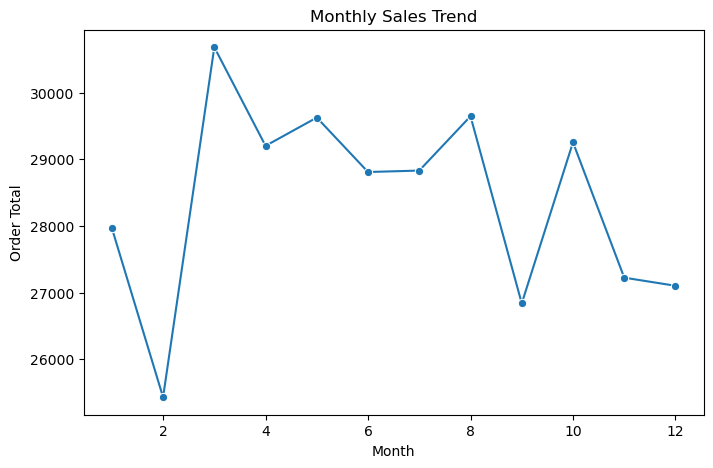

In [47]:
monthly_sales = df.groupby("Month")["Order Total"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=monthly_sales, x="Month", y="Order Total", marker='o')
plt.title("Monthly Sales Trend")
plt.show()


#### 📌 Insights

Identify high and low sales months.

Detect seasonal patterns or trends.

Helps in forecasting and planning marketing or stock strategies.

## MULTIVARIATE ANALYSIS

## Scatterplot with hue (Category)

#### Quantity vs Price Scatter Plot
* Goal : To visualize the relationship between Quantity and Price while also showing how different product categories are distributed, helping identify category-wise patterns.
* Chart : Scatter Plot (Seaborn)

* EDA Type :  Multivariate Analysis

* Structure : Select two numerical columns and one categorical column → plot scatter plot with hue using Seaborn → set figure size and title → display chart

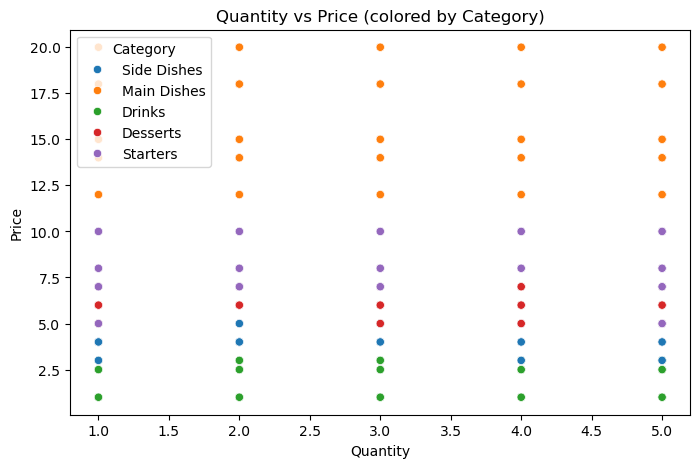

In [17]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Quantity", y="Price", hue="Category")
plt.title("Quantity vs Price (colored by Category)")
plt.show()


#### 📌 Insight
* Identify correlation patterns between Quantity and Price.

* Detect category-wise clustering or overlaps.

* Spot outliers such as unusually high quantity or price.

* Helps in pricing strategy, inventory decisions, and category-level analysi

### Heatmap (correlation between multiple numeric columns)

#### Correlation Heatmap
* Goal : To visualize the correlation between numerical columns (Price, Quantity, Order Total) and see how strongly they are related.
* Chart : Heatmap (Seaborn)

* EDA Type :  Multivariate Analysis

* Structure : Select numerical columns → compute correlation → plot heatmap using Seaborn → annotate values and apply color map → set figure size and title → display chart.

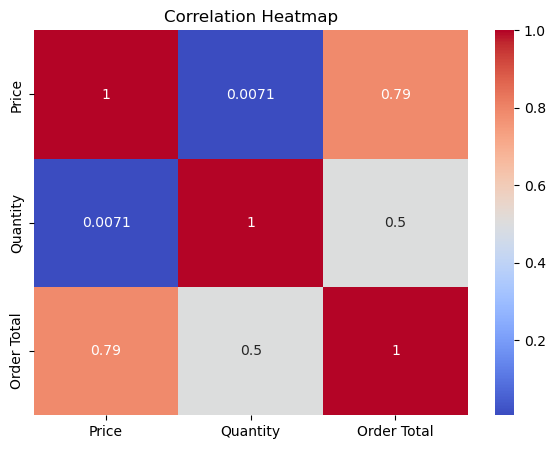

In [18]:
plt.figure(figsize=(7,5))
sns.heatmap(df[["Price","Quantity","Order Total"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


#### 📌 Insight
* Check how strongly Price, Quantity, and Order Total are related.

* Example:

     * High correlation between Order Total and Quantity or Price → confirms Order Total = Price × Quantity.

     * Low correlation between Price and Quantity → no strong relationship between item price and order quantity.

* Helps in feature selection and understanding variable relationships for analysis or modeling.

 ### Category vs Payment Method vs Total (Grouped Bar Plot)

#### Category vs Payment Method vs Total Sales Bar Chart

* Goal : To visualize total sales across categories, while also showing how different payment methods contribute to each category’s sales.
* Chart : Grouped Bar Chart (Seaborn)
* EDA Type : Multivariate Analysis (Categorical + Numerical) – analyzing one numerical variable (Order Total) against two categorical variables (Category and Payment Method). 

* Structure : Select numerical and two categorical columns → plot grouped bar chart using Seaborn with hue → set figure size and title → display chart.

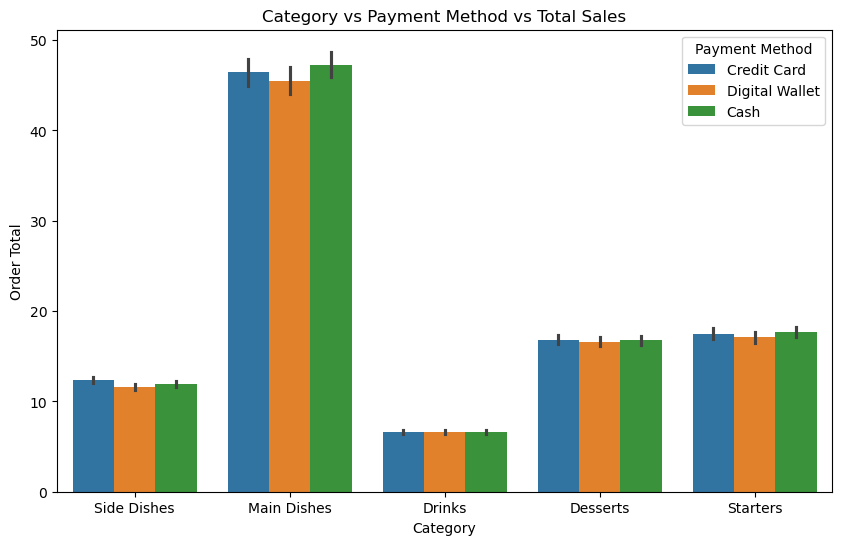

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="Category", y="Order Total", hue="Payment Method")
plt.title("Category vs Payment Method vs Total Sales")
plt.show()


#### 📌 Insight
* Identify which categories generate the most sales.

* See payment method contribution within each category.

* Example insights:

   * Electronics might have high sales mainly via Credit Card.

   * Stationery may have more sales via Cash.

* Helps in payment optimization, marketing focus, and category-level revenue strategy.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# numeric columns only select cheyyuka
num_cols = ["Price", "Quantity", "Order Total"]

sns.pairplot(df[num_cols], diag_kind="kde")
plt.show()


NameError: name 'df' is not defined

### 📌 Conclusion (Final Summary)

This EDA project helped to clearly understand the sales performance, customer behavior, and product trends of the restaurant. After cleaning the data and analyzing different aspects, several useful insights were identified:

1.Sales Trends:
Monthly and daily sales patterns showed clear fluctuations, helping identify peak sales periods and lean periods.

2.Top-Selling Categories & Items:
Certain food categories and items consistently generated higher revenue. This insight can help the restaurant focus on high-demand products.

3.Customer Purchasing Behavior:
Payment method distribution, order quantity patterns, and category preferences reveal how customers shop and which products they prefer.

4.Price & Quantity Influence:
A clear relationship was observed between item price, quantity ordered, and total sales. This helps in improving pricing strategies and stock planning.

5.Operational Improvements:
By identifying slow-moving categories and inconsistent sales days, the restaurant can better plan marketing, menu adjustments, and inventory management.



### 📌 Final Note

Overall, this EDA gives a strong overview of how the restaurant is performing and provides actionable insights that can help improve sales, customer satisfaction, and business planning.

### 📌 Recommendations

1. Focus on High-Demand Categories & Items
Promote the top-selling items through combo offers or featured menu spots to increase revenue further.

2. Improve Low-Performing Items
Rework pricing, portion size, or presentation of low-selling items — or consider removing them from the menu.

3. Optimize Pricing Strategy
Use the price–quantity relationship to keep popular items affordable while adjusting prices of premium items to match demand.

4. Boost Sales During Low Periods
Introduce weekday or off-peak offers (happy hours, discounts) to increase sales during slow times.

5. Enhance Payment Flexibility
Promote customer-preferred payment methods, while maintaining multiple options for convenience.

6. Strengthen Inventory Management
Stock more of the fast-moving categories/items and reduce overstock of slow-moving ones.

7. Targeted Marketing Campaigns
Use insights about customer preferences to run category-focused promotions or seasonal campaigns.

8. Improve Customer Experience During Peak Times
Add more staff or streamline operations during peak sales periods to reduce waiting time.

9. Monitor Monthly Trends Regularly
Keep tracking monthly performance to identify emerging trends and quickly adapt strategies.

